In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [6]:
df = pd.DataFrame([[1.0, 2., 3., 4.],
                   [5., 6., np.nan, 8.],
                   [9., 10., 11., np.nan]
                  ],
                 columns = ['A','B','C','D'])

In [7]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [9]:
df.isna()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [10]:
df.isna().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [12]:
df.isna().sum().sum()

2

In [14]:
df.isna().sum(axis = 1)

0    0
1    1
2    1
dtype: int64

In [15]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [16]:
df.dropna(how = 'all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [17]:
df.dropna(subset = ['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,9.0,10.0,11.0,NaN


In [18]:
df.dropna(thresh=3)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


In [19]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [24]:
simr = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputed_data = simr.fit_transform(df)
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

In [28]:
df.fillna(method = 'bfill')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,11.0,8.0
2,9.0,10.0,11.0,NaN


In [29]:
df.fillna(method = 'ffill')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,9.0,10.0,11.0,8.0


In [30]:
df.apply(lambda x: x.fillna(x.mean()))

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,9.0,10.0,11.0,6.0


In [31]:
df = pd.DataFrame([['green','M',10.1,'class1'],
                  ['red','L',13.5,'class2'],
                  ['blue','XL',15.3,'class1']],
                 columns = ['color','size','price','classlabel'])
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [32]:
size_mapping = {
    'XL': 3,
    'L' : 2,
    'M' : 1
}

In [33]:
df['size'] = df['size'].map(size_mapping)

In [34]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [36]:
inv_size_mapping = {v: k for k,v in size_mapping.items()}

In [37]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [38]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [39]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [40]:
class_mapping

{'class1': 0, 'class2': 1}

In [41]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [42]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [43]:
inv_class_mapping = {k:v for v, k in class_mapping.items()}

In [45]:
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [46]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [47]:
y

array([0, 1, 0], dtype=int64)

In [50]:
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype = np.int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)

In [53]:
X_trans

array([[1],
       [2],
       [0]])

In [61]:
from sklearn.preprocessing import OneHotEncoder


X = df[['color','size','price']].values

ohe = OneHotEncoder()
col_trans = ColumnTransformer([('ohe', ohe , [0])], remainder = 'passthrough')

In [62]:
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 1, 10.1],
       [0.0, 0.0, 1.0, 2, 13.5],
       [1.0, 0.0, 0.0, 3, 15.3]], dtype=object)

In [64]:
pd.get_dummies(df[['price','color','size']], drop_first = True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [66]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [67]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [68]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:, 1:].values, df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

In [70]:
X_train.shape

(124, 13)

In [71]:
X_test.shape

(54, 13)

In [73]:
y_train.shape

(124,)

In [74]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

In [75]:
X_test_norm

array([[0.76109215, 0.49475891, 0.74137931, 0.0173913 , 0.84444444,
        0.62211982, 0.73760933, 0.        , 0.52083333, 0.32593857,
        0.53333333, 0.81746032, 0.38961988],
       [0.9556314 , 0.6918239 , 0.63793103, 0.33913043, 0.73333333,
        0.69124424, 0.62682216, 0.2826087 , 0.35      , 0.33788396,
        0.41333333, 0.80555556, 0.56140351],
       [0.51877133, 0.43396226, 0.86206897, 0.52173913, 0.4       ,
        0.0875576 , 0.        , 0.7826087 , 0.14166667, 0.28327645,
        0.28      , 0.40079365, 0.21052632],
       [0.79180887, 0.15932914, 0.86206897, 0.65217391, 0.51111111,
        0.76036866, 0.80174927, 0.26086957, 0.82083333, 0.37713311,
        0.84      , 0.55952381, 0.71125731],
       [0.32764505, 0.09014675, 0.18965517, 0.4       , 0.        ,
        0.35023041, 0.43731778, 0.2173913 , 0.2625    , 0.29010239,
        0.74666667, 0.86507937, 0.14473684],
       [0.98634812, 0.24737945, 0.87931034, 0.43478261, 0.93333333,
        0.66820276, 0.76967

In [80]:
ex = np.array([0,1,2,3,4,5])

print('표준화의 결과: ' ,(ex - ex.mean()/ex.std()))
print('정규화의 결과: ', (ex - ex.min()) / (ex.max() - ex.min()))

표준화의 결과:  [-1.46385011 -0.46385011  0.53614989  1.53614989  2.53614989  3.53614989]
정규화의 결과:  [0.  0.2 0.4 0.6 0.8 1. ]


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty = 'l1', C = 1., random_state = 42)
lr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [90]:
lr.score(X_train_std, y_train)

1.0

In [92]:
lr.score(X_test_std, y_test)

0.9814814814814815

In [93]:
lr.intercept_

array([-1.32246872, -1.02606166, -2.31906123])

In [94]:
lr.coef_

array([[ 1.4180471 ,  0.        ,  0.96809715, -1.58508952,  0.        ,
         0.        ,  1.0108926 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.81227019,  1.89241985],
       [-1.87684108, -0.09667007, -1.28138043,  0.82052359,  0.        ,
         0.        ,  0.26111179,  0.        ,  0.45464439, -1.52646092,
         1.60434579,  0.        , -2.01420617],
       [ 0.        ,  0.10342403,  0.40452885,  0.        ,  0.        ,
         0.        , -1.89568031,  0.        , -0.17427308,  1.59204121,
        -1.28197127, -0.64115088,  0.        ]])

In [95]:
import matplotlib.pyplot as plt

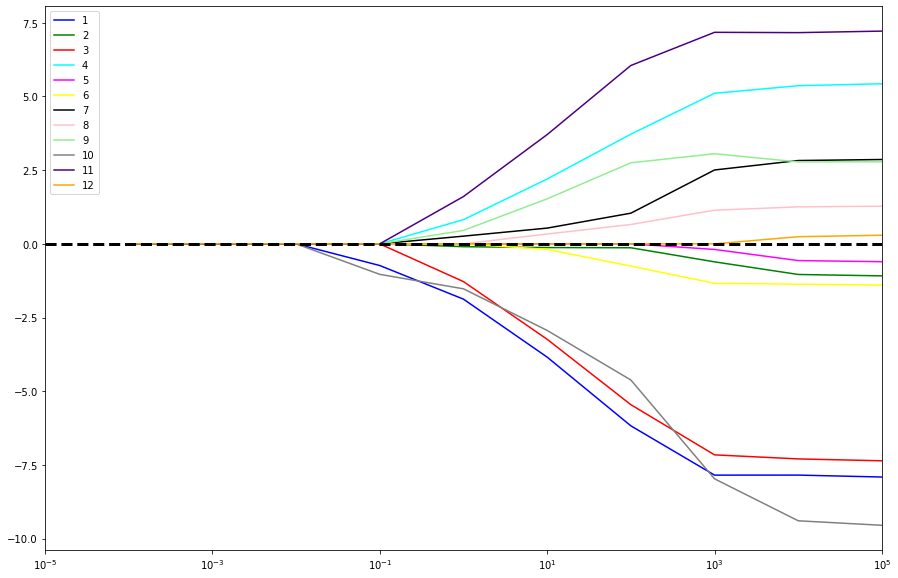

In [109]:
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','gray','indigo','orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', penalty = 'l1', C = 10. ** c, random_state = 42)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10 ** c)
    
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weight[:,column], label = df.columns[column + 1], color = color)
    
plt.xlim([10**-5, 10**5])
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xscale('log')
plt.legend(loc = 'upper left')

In [110]:
from sklearn.ensemble import RandomForestClassifier

feat_label = df.columns[1:]
forest = RandomForestClassifier(n_estimators=300, random_state = 42)
forest.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [111]:
importances = forest.feature_importances_

In [112]:
importances

array([0.11944619, 0.02484647, 0.01344612, 0.03650359, 0.03685123,
       0.06092212, 0.15723148, 0.01024374, 0.03701174, 0.17613534,
       0.0838206 , 0.11161808, 0.1319233 ])

1 ) 10                             0.176135
2 ) 7                              0.157231
3 ) 13                             0.131923
4 ) 1                              0.119446
5 ) 12                             0.111618
6 ) 11                             0.083821
7 ) 6                              0.060922
8 ) 9                              0.037012
9 ) 5                              0.036851
10 ) 4                              0.036504
11 ) 2                              0.024846
12 ) 3                              0.013446
13 ) 8                              0.010244


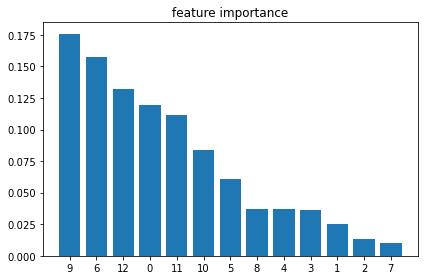

In [119]:
indices = np.argsort(importances)[::-1]
for f in range(X_train_std.shape[1]):
    print('%d ) %-*s %f'%(f+1, 30, feat_label[indices[f]], importances[indices[f]]))
    
plt.title('feature importance')
plt.bar(range(X_train_std.shape[1]), importances[indices], align= 'center')
plt.xticks(range(X_train_std.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()